In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression

In [54]:
df = pd.read_csv(r"/content/drive/MyDrive/Girish Techdata/datasets/archive (18).zip")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,7668.0,2.000405e+03,1.115351e+01,1980.0,1991.0,2000.0,2010.0,2.020000e+03
score,7665.0,6.390411e+00,9.688416e-01,1.9,5.8,6.5,7.1,9.300000e+00
votes,7665.0,8.810850e+04,1.633238e+05,7.0,9100.0,33000.0,93000.0,2.400000e+06
budget,5497.0,3.558988e+07,4.145730e+07,3000.0,10000000.0,20500000.0,45000000.0,3.560000e+08
gross,7479.0,7.850054e+07,1.657251e+08,309.0,4532055.5,20205757.0,76016691.5,2.847246e+09
runtime,7664.0,1.072616e+02,1.858125e+01,55.0,95.0,104.0,116.0,3.660000e+02


In [56]:
for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%' .format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [57]:
df['gross'] = pd.to_numeric(df['gross'], errors='coerce', downcast='integer')

In [58]:
df['gross'].isna().sum()

189

In [59]:
df[df['gross'].isna()]
df['gross'].fillna(0, inplace=True)

In [60]:
df['budget'] = df['budget'].fillna(0)
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].round().astype('int64')

In [11]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0


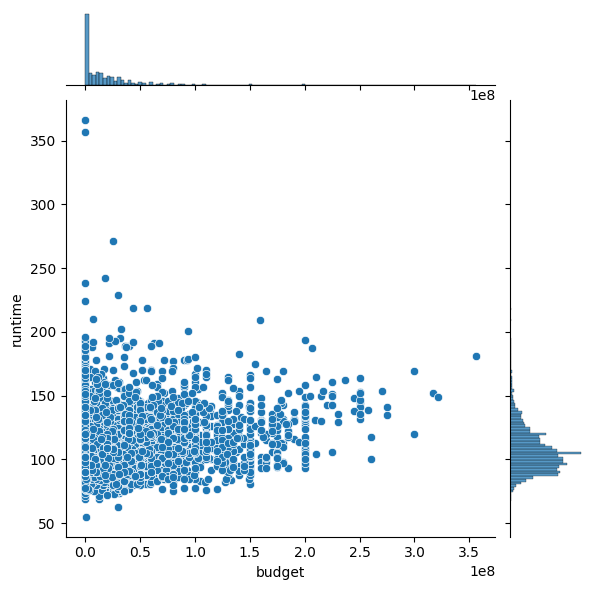

In [12]:
sns.jointplot(data = df, x = df['budget'], y = df['runtime'])

In [62]:
df['new_released'] = df['released'].str.split(',', expand=True)[1]
df['new_released']

0        1980 (United States)
1        1980 (United States)
2        1980 (United States)
3        1980 (United States)
4        1980 (United States)
                ...          
7663     2020 (United States)
7664     2020 (United States)
7665          2020 (Cameroon)
7666     2020 (United States)
7667     2020 (United States)
Name: new_released, Length: 7668, dtype: object

In [63]:
df['NReleased'] = df['new_released'].str.split('(', expand=True)[0]

In [69]:
df.drop(['extracted_numbers', 'new_released', 'Nreleased'], axis=1, inplace = True)

KeyError: ignored

In [68]:
df.sort_values(by=["gross"], inplace = False, ascending = False )

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,new_released,NReleased
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009 (United States),2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019 (United States),2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997 (United States),1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015 (United States),2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018 (United States),2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990 (United States),1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989 (United States),1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989 (United States),1989
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1990 (Japan),1990


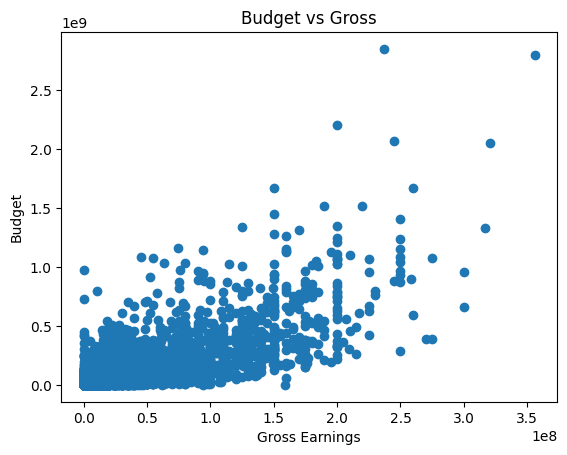

In [17]:
plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')
plt.show()


<Axes: xlabel='budget', ylabel='gross'>

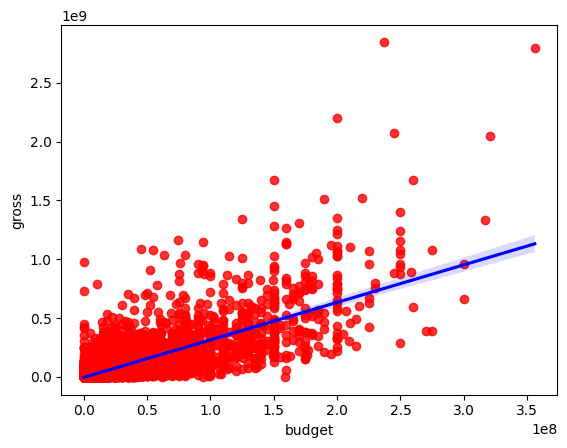

In [21]:
sns.regplot(x = "budget", y = "gross", data = df, scatter_kws={"color" : "red"}, line_kws = {"color": "blue"})

In [42]:
tf = df.corr()

<ipython-input-42-56bba84f47e4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tf = df.corr()


<Axes: >

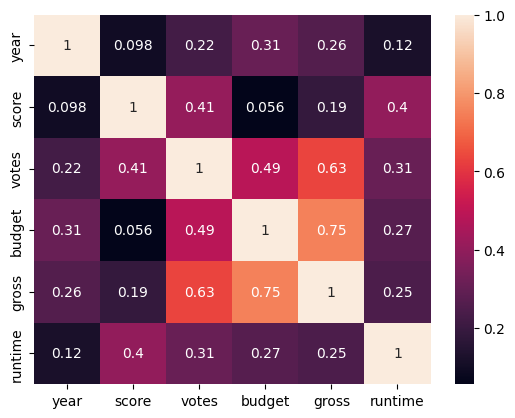

In [25]:
sns.heatmap(tf, annot = True)

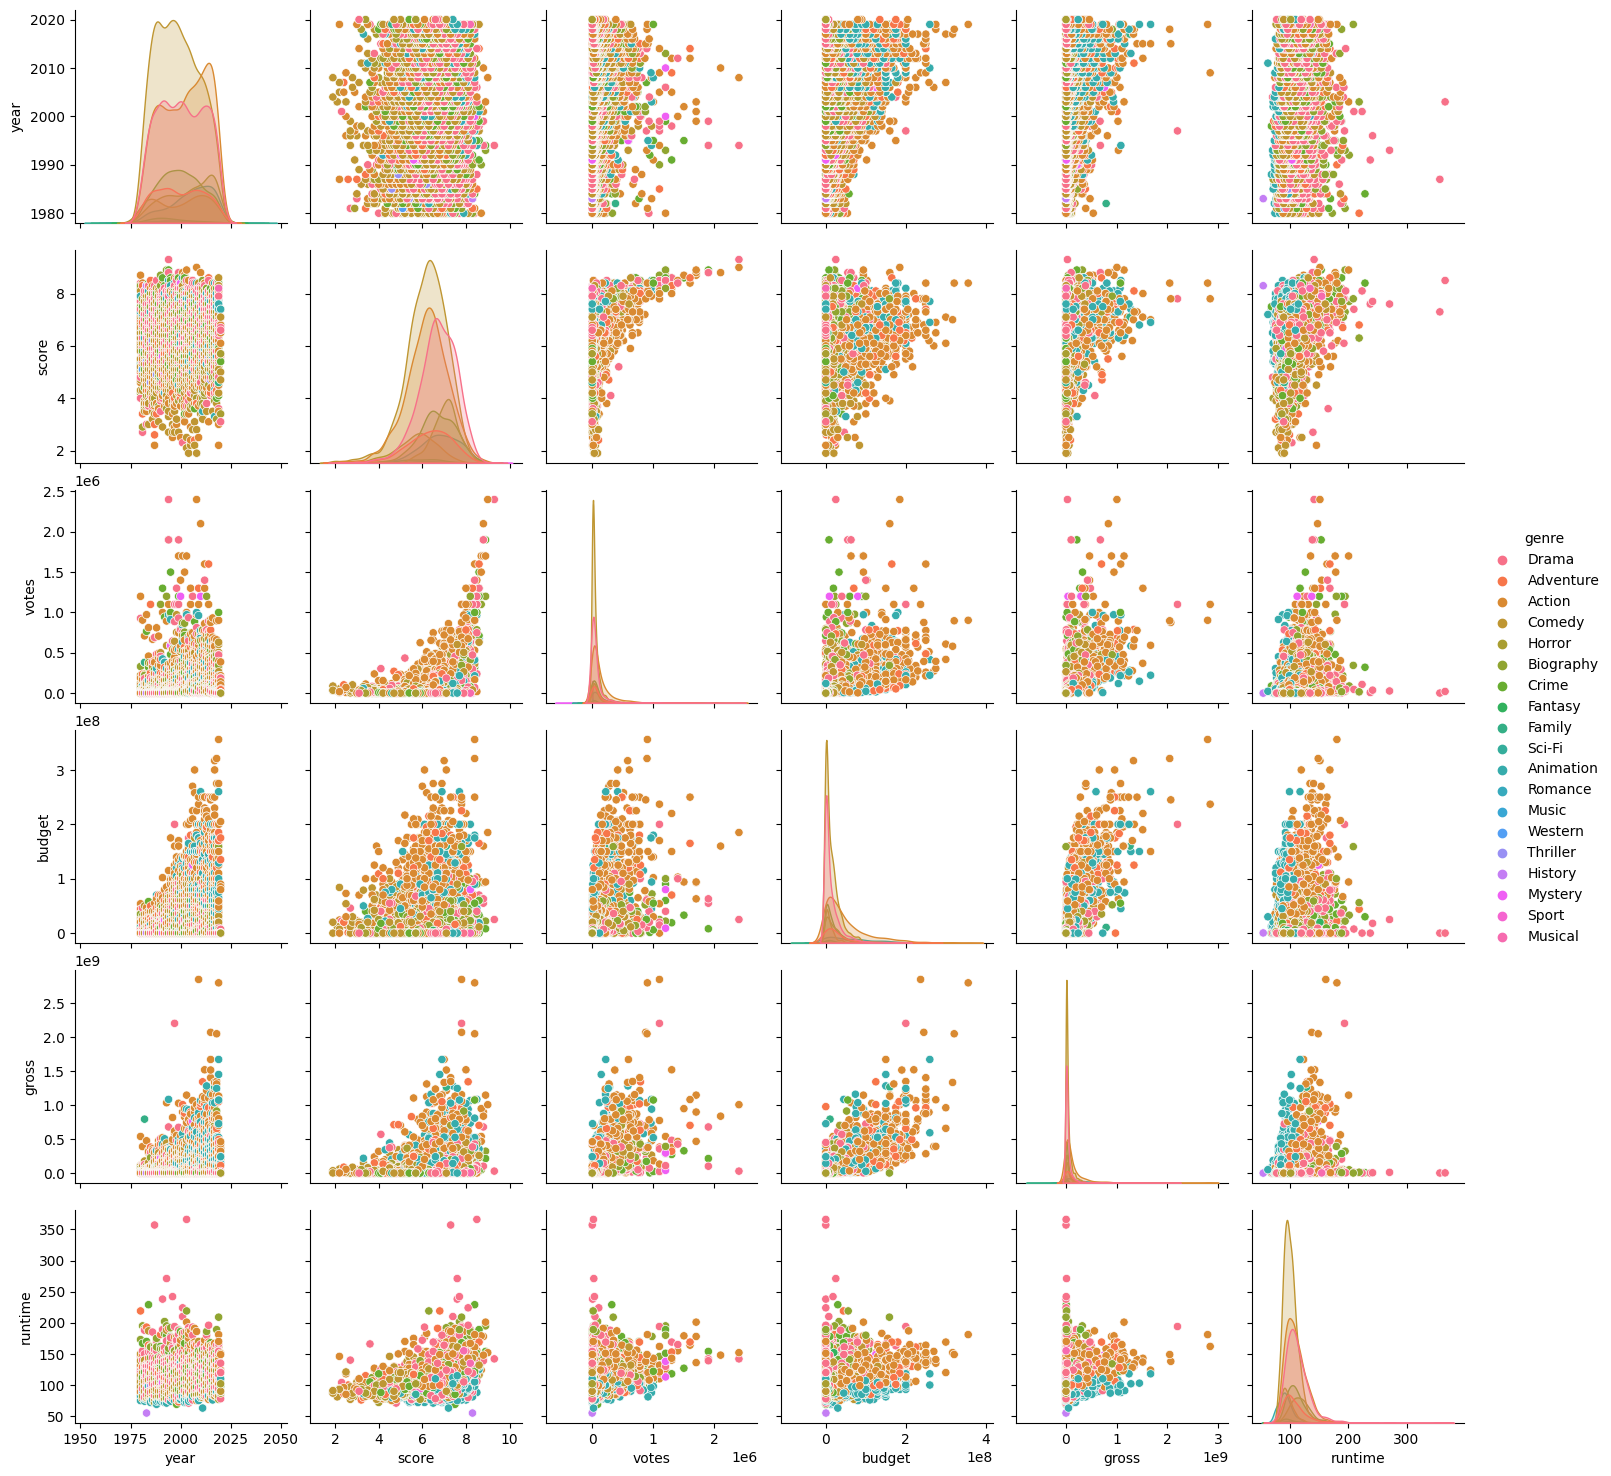

In [27]:
sns.pairplot(data = df, hue = "genre")

In [52]:
df_numerical = df.copy()

for col_name in df_numerical.columns:
    if (df_numerical[col_name].dtype == 'object', 'str'):
        df_numerical[col_name] = df_numerical[col_name].astype('category')
        df_numerical[col_name] = df_numerical[col_name].cat.codes

df_numerical

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,7,6,0,1706,65,915,2589,4015,1048,55,212,4975,2320,79
1,5573,7,1,0,1493,39,394,2269,1633,328,56,99,5275,732,37
2,5142,5,0,0,1772,68,928,1111,2568,1746,56,208,7284,1541,57
3,286,5,4,0,1493,58,549,1301,2001,2247,56,88,5722,1813,21
4,1027,7,4,0,1544,54,437,1054,522,411,56,116,4725,1778,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,0,6,40,2965,12,3,1500,2290,2422,56,4,0,0,23
7664,1678,0,4,40,1108,28,7,774,2615,1887,56,0,0,540,23
7665,4717,0,6,40,194,38,4,2061,2684,2041,56,14,0,942,0
7666,2843,0,6,40,2818,0,0,1184,1825,451,56,6,0,0,53


In [71]:
df.drop([ 'new_released', 'released'], axis=1, inplace = True)

In [72]:
df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime,NReleased
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,2020


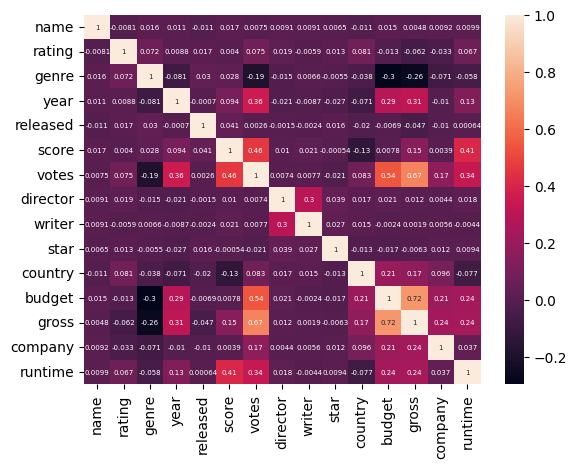

In [110]:
correlation_matirx = df_numerical.corr(method = "pearson")
sns.heatmap(correlation_matirx, annot= True, annot_kws={'size': 5})
plt.title = ('Correlation matrix for numerical features')
plt.xlabel = ('Movie Features')
plt.ylabel = ('Movie Features')
plt.show()